In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [5]:
team_df = pd.read_csv("Resources/Data_V1/Team_00-20.csv")
team_df

,Year,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs,Championship
0,2000,Sacramento Kings,82,20080,39.7,88.2,0.449,6.1,17.1,0.354,...,34.2,46.7,23.4,10.0,5.5,15.5,20.2,105.6,True,False
1,2000,Milwaukee Bucks,82,19780,41.0,89.5,0.458,7.4,19.5,0.379,...,32.9,45.8,24.3,8.8,5.1,14.8,25.4,108.8,True,False
2,2000,Los Angeles Lakers,82,19905,40.9,87.9,0.465,5.8,16.8,0.344,...,33.9,48.2,24.8,7.4,6.4,15.6,24.6,108.4,True,True
3,2000,Dallas Mavericks,82,19805,40.1,87.3,0.459,6.7,17.6,0.381,...,33.4,44.2,22.6,8.0,6.4,14.8,24.8,107.1,True,False
4,2000,Toronto Raptors,82,19955,40.3,92.2,0.437,5.7,15.4,0.369,...,33.4,48.2,26.5,7.9,6.9,14.3,23.1,105.9,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,2019,New York Knicks,66,15965,40.2,89.9,0.447,9.6,28.5,0.337,...,34.7,46.8,22.2,7.7,4.8,14.4,22.3,106.5,False,False
592,2019,Cleveland Cavaliers,65,15725,40.5,88.4,0.458,11.2,32.0,0.351,...,33.6,44.5,23.2,6.9,3.3,16.6,18.4,107.5,False,False
593,2019,Chicago Bulls,65,15675,39.5,88.5,0.447,12.2,35.1,0.348,...,31.4,41.8,23.2,10.0,4.1,15.4,21.8,106.7,False,False
594,2019,Golden State Warriors,65,15725,38.2,87.2,0.438,10.3,30.9,0.334,...,32.5,42.4,25.3,8.1,4.5,14.7,19.8,105.2,False,False


In [18]:
current_team_df = team_df.replace({'Seattle SuperSonics': 'Oklahoma City Thunder', 'Vancouver Grizzlies': 'Memphis Grizzlies', 'New Jersey Nets': 'Brooklyn Nets',})
#current_team_df.to_csv(r"C:\Users\Hollow\Desktop\NBA_CSV\NBA2.csv")
current_team_df = pd.read_csv(r"C:\Users\Hollow\Desktop\NBA_CSV\NBA2.csv")
current_team_df

,Unnamed: 0,Year,Team,G,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs,Championship
0,0,2000,Sacramento Kings,82,20080,39.7,88.2,0.449,6.1,17.1,...,34.2,46.7,23.4,10.0,5.5,15.5,20.2,105.6,True,False
1,1,2000,Milwaukee Bucks,82,19780,41.0,89.5,0.458,7.4,19.5,...,32.9,45.8,24.3,8.8,5.1,14.8,25.4,108.8,True,False
2,2,2000,Los Angeles Lakers,82,19905,40.9,87.9,0.465,5.8,16.8,...,33.9,48.2,24.8,7.4,6.4,15.6,24.6,108.4,True,True
3,3,2000,Dallas Mavericks,82,19805,40.1,87.3,0.459,6.7,17.6,...,33.4,44.2,22.6,8.0,6.4,14.8,24.8,107.1,True,False
4,4,2000,Toronto Raptors,82,19955,40.3,92.2,0.437,5.7,15.4,...,33.4,48.2,26.5,7.9,6.9,14.3,23.1,105.9,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,591,2019,New York Knicks,66,15965,40.2,89.9,0.447,9.6,28.5,...,34.7,46.8,22.2,7.7,4.8,14.4,22.3,106.5,False,False
592,592,2019,Cleveland Cavaliers,65,15725,40.5,88.4,0.458,11.2,32.0,...,33.6,44.5,23.2,6.9,3.3,16.6,18.4,107.5,False,False
593,593,2019,Chicago Bulls,65,15675,39.5,88.5,0.447,12.2,35.1,...,31.4,41.8,23.2,10.0,4.1,15.4,21.8,106.7,False,False
594,594,2019,Golden State Warriors,65,15725,38.2,87.2,0.438,10.3,30.9,...,32.5,42.4,25.3,8.1,4.5,14.7,19.8,105.2,False,False


In [3]:
opp_df = pd.read_csv("Resources/Data_V1/Opp_00-20.csv")
opp_df.head()

,Year,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs2,Championship
0,2000,New York Knicks,82,19905,35.7,85.7,0.417,6.2,17.6,0.352,...,33.6,45.8,21.9,8.3,4.7,16.9,24.4,98.2,True,False
1,2000,Miami Heat,82,19880,37.4,86.8,0.431,5.0,15.1,0.331,...,35.0,47.7,19.7,8.3,5.9,17.7,25.3,98.5,True,False
2,2000,San Antonio Spurs,82,19830,38.3,91.5,0.419,4.6,14.1,0.329,...,32.9,45.9,21.8,8.1,5.8,15.0,26.3,98.0,True,False
3,2000,Charlotte Hornets,82,19880,37.4,87.8,0.426,5.3,14.6,0.360,...,32.9,44.9,23.6,8.3,5.1,16.3,23.9,99.5,True,False
4,2000,Philadelphia 76ers,82,19855,38.3,89.4,0.429,5.7,16.7,0.342,...,31.6,44.7,23.6,9.0,6.1,16.8,25.9,98.9,True,False


In [4]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          596 non-null    int64  
 1   Team          596 non-null    object 
 2   G             596 non-null    int64  
 3   MP            596 non-null    int64  
 4   FG            596 non-null    float64
 5   FGA           596 non-null    float64
 6   FG%           596 non-null    float64
 7   3P            596 non-null    float64
 8   3PA           596 non-null    float64
 9   3P%           596 non-null    float64
 10  2P            596 non-null    float64
 11  2PA           596 non-null    float64
 12  2P%           596 non-null    float64
 13  FT            596 non-null    float64
 14  FTA           596 non-null    float64
 15  FT%           596 non-null    float64
 16  ORB           596 non-null    float64
 17  DRB           596 non-null    float64
 18  TRB           596 non-null    

In [5]:

team_df.dtypes

Year              int64
Team             object
G                 int64
MP                int64
FG              float64
FGA             float64
FG%             float64
3P              float64
3PA             float64
3P%             float64
2P              float64
2PA             float64
2P%             float64
FT              float64
FTA             float64
FT%             float64
ORB             float64
DRB             float64
TRB             float64
AST             float64
STL             float64
BLK             float64
TOV             float64
PF              float64
PTS             float64
Playoffs           bool
Championship       bool
dtype: object

In [6]:
champions_df = team_df[team_df.Championship]

champions_df

,Year,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs,Championship
2,2000,Los Angeles Lakers,82,19905,40.9,87.9,0.465,5.8,16.8,0.344,...,33.9,48.2,24.8,7.4,6.4,15.6,24.6,108.4,True,True
31,2001,Los Angeles Lakers,82,19780,41.5,90.1,0.461,6.7,19.0,0.354,...,34.3,47.8,24.8,8.2,6.3,13.7,24.0,109.4,True,True
69,2002,San Antonio Spurs,82,19830,39.1,84.7,0.462,6.0,17.1,0.354,...,34.4,47.0,22.0,8.5,7.1,17.4,22.5,105.6,True,True
110,2003,Detroit Pistons,82,19780,37.9,87.2,0.435,4.6,13.4,0.344,...,34.4,48.4,23.5,9.1,7.9,17.1,23.0,102.0,True,True
133,2004,San Antonio Spurs,82,19805,39.8,87.9,0.453,6.9,19.0,0.363,...,33.9,47.4,24.1,8.4,7.4,15.3,23.4,107.5,True,True
151,2005,Miami Heat,82,19755,40.3,84.3,0.478,6.6,19.1,0.345,...,35.5,46.9,22.4,6.9,5.9,15.7,24.8,108.7,True,True
189,2006,San Antonio Spurs,82,19780,40.5,85.5,0.474,8.0,21.1,0.381,...,34.8,45.1,24.5,7.9,5.6,15.4,21.5,109.2,True,True
216,2007,Boston Celtics,82,19755,39.9,84.0,0.475,8.0,20.9,0.381,...,34.9,46.0,24.5,9.3,5.1,16.6,24.9,110.2,True,True
238,2008,Los Angeles Lakers,82,19780,42.6,89.8,0.474,7.0,19.5,0.361,...,33.3,46.3,24.5,9.2,5.4,14.2,21.8,112.8,True,True
277,2009,Los Angeles Lakers,82,19830,41.0,89.7,0.457,6.9,20.4,0.341,...,34.7,47.4,22.6,8.0,5.2,14.3,20.8,108.8,True,True


In [7]:
champions_opp_df = opp_df[opp_df.Championship]
champions_opp_df

,Year,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs2,Championship
22,2000,Los Angeles Lakers,82,19905,39.2,89.6,0.438,5.4,15.3,0.354,...,31.6,44.5,21.8,8.1,4.3,14.1,26.3,104.8,True,True
38,2001,Los Angeles Lakers,82,19780,37.8,89.3,0.424,5.3,16.6,0.317,...,33.3,46.7,21.6,7.7,4.7,15.1,24.9,101.7,True,True
60,2002,San Antonio Spurs,82,19830,38.5,90.1,0.427,4.8,14.0,0.339,...,31.2,45.1,21.0,8.9,5.7,16.6,25.7,99.7,True,True
88,2003,Detroit Pistons,82,19780,36.4,88.1,0.413,4.9,16.3,0.302,...,32.5,46.0,21.6,9.0,5.7,18.1,25.9,95.4,True,True
116,2004,San Antonio Spurs,82,19805,37.0,86.7,0.426,4.4,12.0,0.367,...,32.7,44.9,18.9,8.1,5.7,16.9,25.8,98.8,True,True
159,2005,Miami Heat,82,19755,38.1,86.6,0.440,6.5,18.0,0.361,...,31.3,42.3,21.2,7.4,4.0,14.1,25.7,104.5,True,True
176,2006,San Antonio Spurs,82,19780,38.7,87.4,0.443,5.0,14.9,0.334,...,32.2,43.4,19.1,7.8,4.6,15.9,23.5,99.9,True,True
207,2007,Boston Celtics,82,19755,35.5,84.7,0.419,6.5,20.5,0.316,...,30.6,42.6,20.6,7.9,5.2,17.5,24.3,98.9,True,True
248,2008,Los Angeles Lakers,82,19780,39.2,87.8,0.447,7.5,21.9,0.345,...,31.4,43.7,23.9,8.2,5.0,16.4,23.4,104.7,True,True
274,2009,Los Angeles Lakers,82,19830,39.8,89.2,0.446,6.8,20.7,0.328,...,33.2,45.1,23.4,7.5,4.7,15.1,22.7,103.7,True,True


In [8]:
print('Average PPG per Champion is %.3f' % champions_df['PTS'].mean())
print('Average PPG allowed per Champion is %.3f' % champions_opp_df['PTS'].mean())
print('Standard deviation of the PPG per champion is %.3f' % champions_df['PTS'].std())
print('Standard deviation of the PPG allowed per champion is %.3f' % champions_opp_df['PTS'].std())

Average PPG per Champion is 109.925
Average PPG allowed per Champion is 102.715
Standard deviation of the PPG per champion is 3.100
Standard deviation of the PPG allowed per champion is 3.154


In [9]:
playoff_df = team_df[team_df.Playoffs]
playoff_df

,Year,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs,Championship
0,2000,Sacramento Kings,82,20080,39.7,88.2,0.449,6.1,17.1,0.354,...,34.2,46.7,23.4,10.0,5.5,15.5,20.2,105.6,True,False
1,2000,Milwaukee Bucks,82,19780,41.0,89.5,0.458,7.4,19.5,0.379,...,32.9,45.8,24.3,8.8,5.1,14.8,25.4,108.8,True,False
2,2000,Los Angeles Lakers,82,19905,40.9,87.9,0.465,5.8,16.8,0.344,...,33.9,48.2,24.8,7.4,6.4,15.6,24.6,108.4,True,True
3,2000,Dallas Mavericks,82,19805,40.1,87.3,0.459,6.7,17.6,0.381,...,33.4,44.2,22.6,8.0,6.4,14.8,24.8,107.1,True,False
4,2000,Toronto Raptors,82,19955,40.3,92.2,0.437,5.7,15.4,0.369,...,33.4,48.2,26.5,7.9,6.9,14.3,23.1,105.9,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2019,Brooklyn Nets,72,17480,39.4,88.0,0.448,12.7,37.2,0.343,...,36.3,46.7,23.8,6.3,4.4,14.9,20.4,108.9,True,False
583,2019,Utah Jazz,72,17355,40.5,85.9,0.471,13.5,35.6,0.380,...,36.1,45.3,22.6,6.1,4.1,15.3,20.6,112.3,True,False
584,2019,Indiana Pacers,73,17620,42.3,88.9,0.476,10.2,28.2,0.363,...,34.3,43.0,26.0,7.5,5.2,13.3,19.9,110.0,True,False
585,2019,Oklahoma City Thunder,72,17430,40.1,85.8,0.468,10.7,30.3,0.355,...,34.8,43.0,21.8,7.7,4.9,13.7,19.4,110.8,True,False


In [10]:
print('Average PPG per Playoff Team is %.3f' % playoff_df['PTS'].mean())

Average PPG per Playoff Team is 108.151


In [11]:
stats_2019 = team_df[team_df['Year'] == '2019']
stats_2019

,Year,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs,Championship


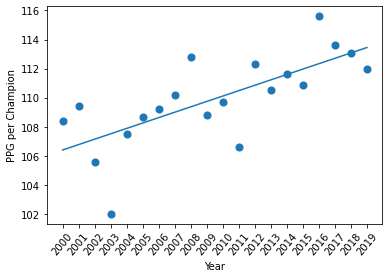

In [12]:
pts = champions_df['PTS']
year = champions_df['Year']

#annotations = champions_df['Team']
#annotations = ["Los Angeles Lakers", "Los Angeles Lakers", "San Antonio Spurs", "Detroit Pistons", "San Antonio Spurs", "Miami Heat", "San Antonio Spurs", "Boston Celtics", "Los Angeles Lakers", "Los Angeles Lakers", "Dallas Mavericks", "Miami Heat", "Miami Heat", "San Antonio Spurs", "Golden State Warriors", "Cleveland Cavaliers", "Golden State Warriors", "Golden State Warriors", "Toronto Raptors", "Los Angeles Lakers"]

#(slope, intercept, rvalue, pvalue, stderr) = linregress(year, pts)
#regress_values = year * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(year, pts, s=50)

#plt.plot(year,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
m, b = np.polyfit(year, pts, 1)
plt.xticks(np.arange(min(year), max(year)+1, 1.0))
plt.tick_params(axis="x", rotation=50)
plt.xlabel('Year')
plt.ylabel('PPG per Champion')

#for i, label in enumerate(annotations):
    #plt.annotate(label, (year[i], pts[i]))
    
plt.plot(year, m*year+b)
plt.show()

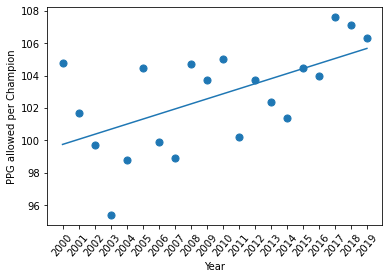

In [13]:
opp_pts = champions_opp_df['PTS']
opp_year = champions_opp_df['Year']

#annotations = champions_df['Team']
#annotations = ["Los Angeles Lakers", "Los Angeles Lakers", "San Antonio Spurs", "Detroit Pistons", "San Antonio Spurs", "Miami Heat", "San Antonio Spurs", "Boston Celtics", "Los Angeles Lakers", "Los Angeles Lakers", "Dallas Mavericks", "Miami Heat", "Miami Heat", "San Antonio Spurs", "Golden State Warriors", "Cleveland Cavaliers", "Golden State Warriors", "Golden State Warriors", "Toronto Raptors", "Los Angeles Lakers"]

#(slope, intercept, rvalue, pvalue, stderr) = linregress(year, pts)
#regress_values = year * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(opp_year, opp_pts, s=50)

#plt.plot(year,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
m, b = np.polyfit(opp_year, opp_pts, 1)
plt.xticks(np.arange(min(opp_year), max(opp_year)+1, 1.0))
plt.tick_params(axis="x", rotation=50)
plt.xlabel('Year')
plt.ylabel('PPG allowed per Champion')

#for i, label in enumerate(annotations):
    #plt.annotate(label, (year[i], pts[i]))
    
plt.plot(opp_year, m*opp_year+b)
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(year, pts)
sc = lr_model.score(year, pts)
print('R2 score: %.3f' % sc)

ValueError: Expected 2D array, got 1D array instead:
array=[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

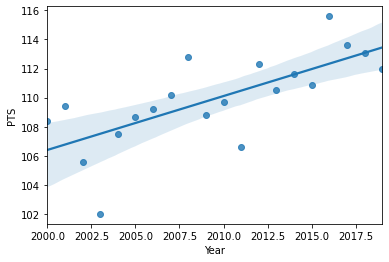

In [15]:
import seaborn as sns
pts = champions_df['PTS']
year = champions_df['Year']

sns.regplot(year, pts)

The r-squared is: 0.5015254746702007


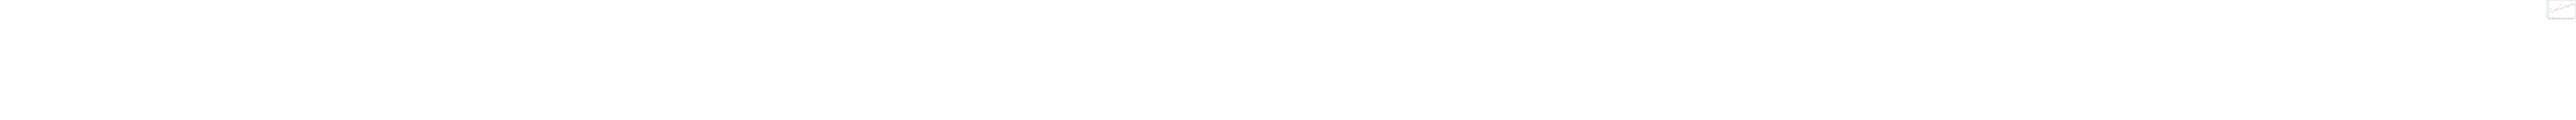

In [16]:
# Add the linear regression equation and line to plot
from scipy.stats import linregress
year = champions_df['Year']
pts = champions_df['PTS']

(slope, intercept, rvalue, pvalue, stderr) = linregress(year, pts)
regress_values = year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(year,pts)
plt.plot(year,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
#plt.xlabel('Year')
#plt.ylabel('PPG per Champion')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3420676404312778


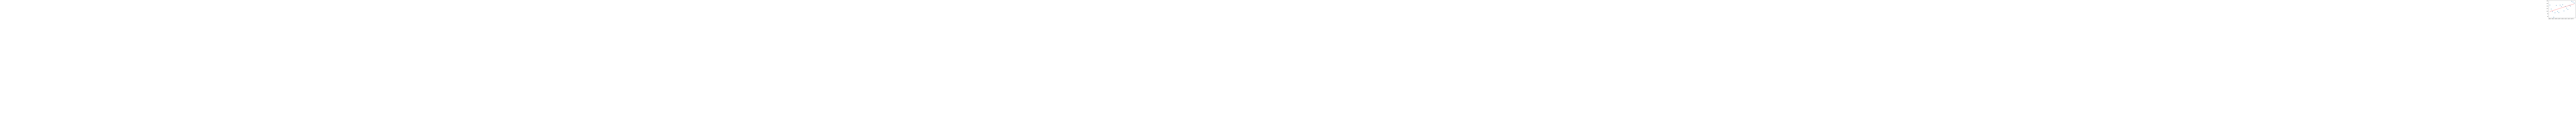

In [17]:
# Add the linear regression equation and line to plot
from scipy.stats import linregress
year = champions_opp_df['Year']
pts = champions_opp_df['PTS']

(slope, intercept, rvalue, pvalue, stderr) = linregress(year, pts)
regress_values = year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(year,pts)
plt.plot(year,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
#plt.xlabel('Year')
#plt.ylabel('PPG per Champion')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [18]:
year

22     2000
38     2001
60     2002
88     2003
116    2004
159    2005
176    2006
207    2007
248    2008
274    2009
305    2010
329    2011
360    2012
391    2013
430    2014
449    2015
486    2016
523    2017
544    2018
573    2019
Name: Year, dtype: int64

In [19]:
Pistons_2003 = champions_df.iloc[2003]

IndexError: single positional indexer is out-of-bounds

In [ ]:
blks = champions_df['BLK']
year = champions_df['Year']

#annotations = champions_df['Team']
#annotations = ["Los Angeles Lakers", "Los Angeles Lakers", "San Antonio Spurs", "Detroit Pistons", "San Antonio Spurs", "Miami Heat", "San Antonio Spurs", "Boston Celtics", "Los Angeles Lakers", "Los Angeles Lakers", "Dallas Mavericks", "Miami Heat", "Miami Heat", "San Antonio Spurs", "Golden State Warriors", "Cleveland Cavaliers", "Golden State Warriors", "Golden State Warriors", "Toronto Raptors", "Los Angeles Lakers"]

#(slope, intercept, rvalue, pvalue, stderr) = linregress(year, pts)
#regress_values = year * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(year, blks, s=50)

#plt.plot(year,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
m, b = np.polyfit(year, blks, 1)
plt.xticks(np.arange(min(year), max(year)+1, 1.0))
plt.tick_params(axis="x", rotation=50)
plt.xlabel('Year')
plt.ylabel('Blocks per Champion')

#for i, label in enumerate(annotations):
    #plt.annotate(label, (year[i], pts[i]))
    
plt.plot(year, m*year+b)
plt.show()

In [ ]:
stl = champions_df['STL']
year = champions_df['Year']

#annotations = champions_df['Team']
#annotations = ["Los Angeles Lakers", "Los Angeles Lakers", "San Antonio Spurs", "Detroit Pistons", "San Antonio Spurs", "Miami Heat", "San Antonio Spurs", "Boston Celtics", "Los Angeles Lakers", "Los Angeles Lakers", "Dallas Mavericks", "Miami Heat", "Miami Heat", "San Antonio Spurs", "Golden State Warriors", "Cleveland Cavaliers", "Golden State Warriors", "Golden State Warriors", "Toronto Raptors", "Los Angeles Lakers"]

#(slope, intercept, rvalue, pvalue, stderr) = linregress(year, pts)
#regress_values = year * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(year, stl, s=50)

#plt.plot(year,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
m, b = np.polyfit(year, stl, 1)
plt.xticks(np.arange(min(year), max(year)+1, 1.0))
plt.tick_params(axis="x", rotation=50)
plt.xlabel('Year')
plt.ylabel('Steal per game per Champion')

#for i, label in enumerate(annotations):
    #plt.annotate(label, (year[i], pts[i]))
    
plt.plot(year, m*year+b)
plt.show()

In [20]:
print('Average 3 pointer made per Championship Team is %.3f' % champions_df['3P'].mean())

Average 3 pointer made per Championship Team is 8.410


In [21]:
print('Average 3 pointer made per Playoff Team is %.3f' % playoff_df['3P'].mean())

Average 3 pointer made per Playoff Team is 8.060
